# Frame Sampler

This notebook samples frames from the videos database to be used for data annotation and model training.

Since transfer learning is intended to be used based on a very similar problem, and since each frame contains at least tens of objects, there will hopefully be no need for many frames to manually-annotate.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, sys
from pathlib import Path

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [3]:
N_VIDEOS = 12
FRAMES_PER_VIDEO = 1

INPUT = Path(r'D:\Media\Videos\Ayalon')
OUTPUT = Path(r'sampled_frames')

### Sample videos

In [4]:
all_videos = [f for f in os.listdir(INPUT) if f.endswith('.mp4')]
sampled_videos = np.random.choice(all_videos, size=N_VIDEOS, replace=False)
sampled_videos

array(['20190620_213113.mp4', '20190612_124811.mp4',
       '20190616_085753.mp4', '20190529_154953.mp4',
       '20190520_105429.mp4', '20190616_192718.mp4',
       '20190608_155249_shavuot.eve.mp4', '20190622_094921.mp4',
       '20190612_165539.mp4', '20190620_170634.mp4'], dtype='<U39')

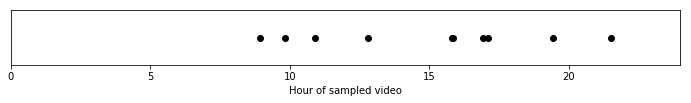

In [5]:
plt.figure(figsize=(12,1))
plt.yticks([], [])
plt.xlim([0,24])
plt.xlabel('Hour of sampled video')
plt.plot([int(v[9:11])+int(v[11:13])/60 for v in sampled_videos], [0 for _ in sampled_videos], 'ko');

### Sample frames & save

In [7]:
for video in sampled_videos:
    
    cap = cv2.VideoCapture(str(INPUT/video))
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    sampled_frames = sorted(np.random.randint(0,n_frames,FRAMES_PER_VIDEO))
    
    for i in sampled_frames:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        _, frame = cap.read()
        cv2.imwrite(str(OUTPUT/(video[:-4] + '_' + str(i) + '.png')), frame)